# Assignment 5. EDA

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Load the Data Sets

In [2]:
cd = pd.read_csv('Cardiotocographic.csv') 
cd

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


## Data Cleaning and Preparation


In [1]:
# Handling the missing values

In [3]:
cd.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [4]:
cd.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
cd['LB'].fillna(cd['LB'].mean(),inplace=True)
cd['AC'].fillna(cd['AC'].mean(),inplace=True)
cd['DS'].fillna(cd['DS'].mean(),inplace=True)
cd['DP'].fillna(cd['DP'].mean(),inplace=True)
cd['MLTV'].fillna(cd['MLTV'].mean(),inplace=True)
cd['Width'].fillna(cd['Width'].mean(),inplace=True)
cd['Tendency'].fillna(cd['Tendency'].mean(),inplace=True)
cd['NSP'].fillna(cd['NSP'].mean(),inplace=True)

In [6]:
cd.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [7]:
cd.duplicated().sum()


2

In [8]:
cd.drop_duplicates(inplace=True)

In [9]:
cd.duplicated().sum()

0

In [10]:
cd.drop(columns=['DS','DP','NSP'],inplace=True)
cd.head()

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.0,0.000000,0.000000,73.0,0.5,43.0,2.4,64.0,0.999926
1,132.000000,0.006380,0.0,0.006380,0.003190,17.0,2.1,0.0,10.4,130.0,0.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,16.0,2.1,0.0,13.4,130.0,0.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,16.0,2.4,0.0,23.0,117.0,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,16.0,2.4,0.0,19.9,117.0,1.000000


### Identify and correct any inconsistencies in data types 

In [11]:
cd.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
dtype: object

### Detect and treat outliers 

In [12]:
# Function to remove outliers using IQR
def outlier_Detection(cd,columns):
    for col in columns:
        Q1=cd[col].quantile(0.25)
        Q3=cd[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        cd[col]=np.where(cd[col]>upper,upper,np.where(cd[col]<lower,lower,cd[col]))
    return cd 


In [13]:
 outlier_Detection(cd,['LB','AC','FM','UC','DL','ASTV','MSTV','ALTV','MLTV','Width','Tendency',])


,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,27.5,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.0,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.0,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.0,20.1,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.0,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006421,0.007426,0.000000,79.0,0.2,25.0,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.0,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.0,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.0,7.0,66.0,1.000000


<Axes: ylabel='LB'>

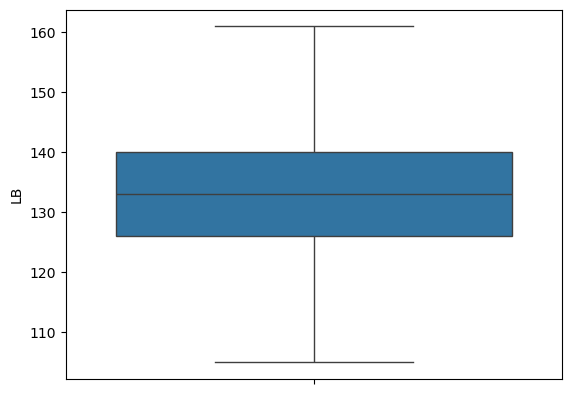

In [14]:
sns.boxplot(cd['LB'])

<Axes: ylabel='AC'>

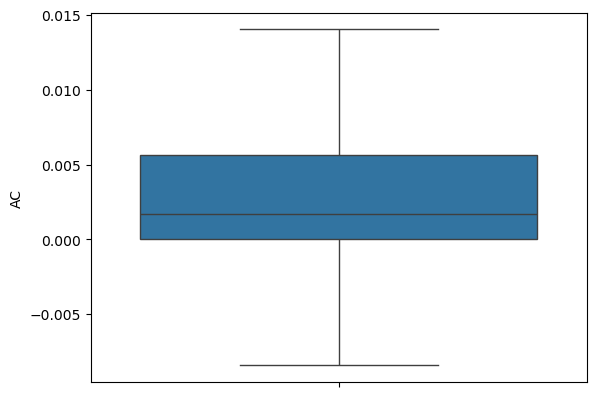

In [15]:
sns.boxplot(cd['AC'])

<Axes: ylabel='Width'>

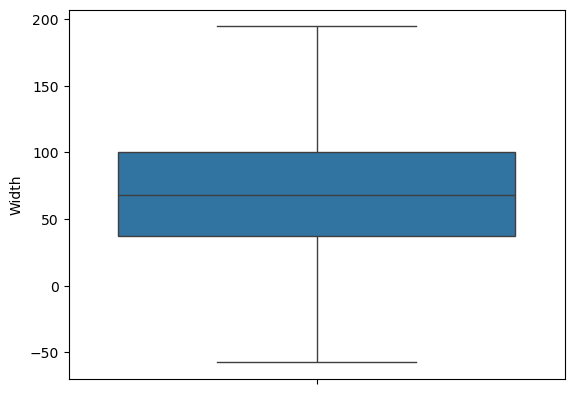

In [16]:
sns.boxplot(cd['Width'])

### Statistical Summary:

In [17]:
cd.describe()

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000
mean,133.292118,0.003148,0.001570,0.004365,0.001772,46.998334,1.304554,6.697979,8.011660,70.352452,0.319963
std,9.926749,0.003827,0.002487,0.003001,0.002670,17.609911,0.781303,10.381254,5.046506,39.575996,0.621818
min,105.000000,-0.008418,-0.003853,-0.005158,-0.004938,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000
25%,126.000000,0.000000,0.000000,0.001858,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000
50%,133.000000,0.001668,0.000000,0.004486,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000
max,161.000000,0.014030,0.006421,0.013552,0.008230,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000


In [18]:
# for IQR

Q1=cd.quantile(0.25)
Q3=cd.quantile(0.75)
iqr=Q3-Q1
iqr

LB          14.000000
AC           0.005612
FM           0.002568
UC           0.004678
DL           0.003292
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
dtype: float64

## Data Visualization

Text(0.5, 1.0, 'Cardiotocographic')

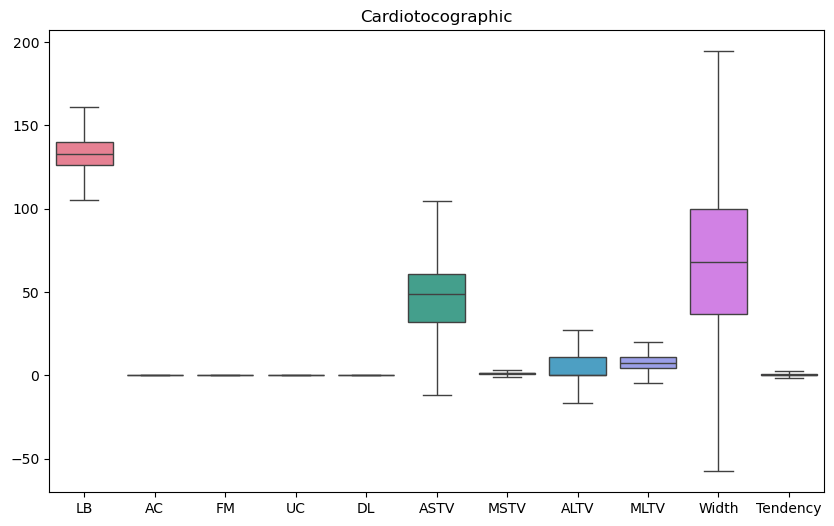

In [19]:
# BoxPLot

plt.figure(figsize =(10,6))
sns.boxplot(cd)
plt.title('Cardiotocographic')

<Figure size 3000x2500 with 0 Axes>

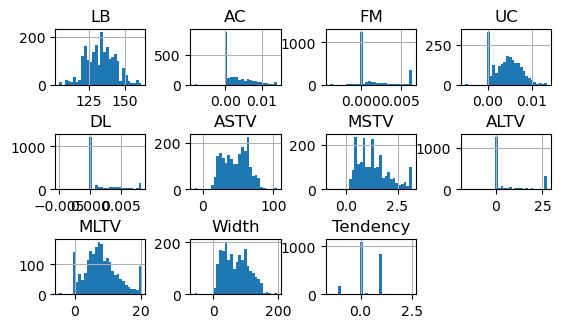

In [20]:
# Histograms

plt.figure(figsize = (30,25))
plt.tight_layout()
cd.hist(layout=(4,4),bins=30)
plt.subplots_adjust(hspace = 0.9, wspace = 0.5)
plt.show()

Text(0, 0.5, 'FM')

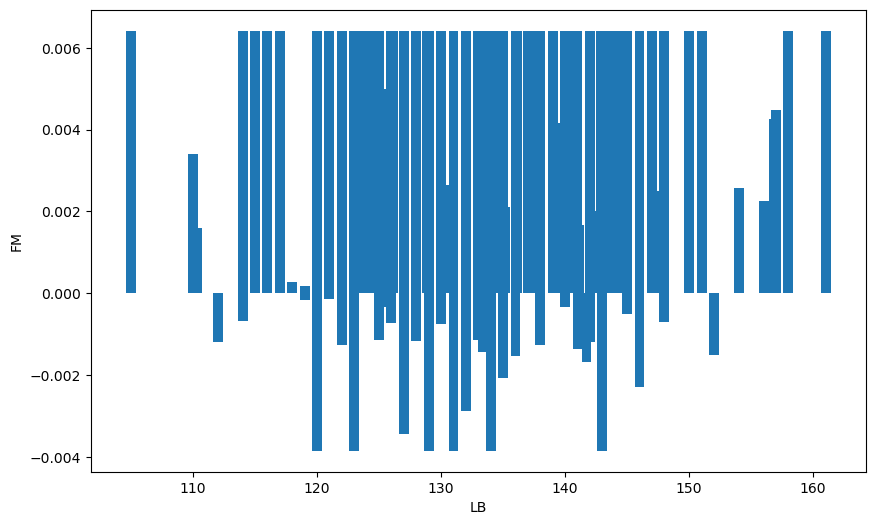

In [21]:
# Barchart

plt.figure(figsize=(10,6))
plt.bar(cd['LB'],cd['FM'])
plt.xlabel('LB')
plt.ylabel('FM')

In [22]:
# correlation 

cd.corr()

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
LB,1.000000,-0.081669,-0.006815,-0.163308,-0.156278,0.285463,-0.295017,0.322748,-0.042275,-0.140008,0.281361
AC,-0.081669,1.000000,0.076091,0.093575,-0.102934,-0.273178,0.217933,-0.409829,-0.152032,0.283771,0.029333
FM,-0.006815,0.076091,1.000000,-0.318156,-0.018024,0.155798,0.070412,-0.013820,-0.036313,0.164247,0.000673
UC,-0.163308,0.093575,-0.318156,1.000000,0.268151,-0.217484,0.298462,-0.294226,-0.072964,0.131110,-0.074266
DL,-0.156278,-0.102934,-0.018024,0.268151,1.000000,-0.112289,0.566625,-0.296383,-0.242173,0.514348,0.014583
ASTV,0.285463,-0.273178,0.155798,-0.217484,-0.112289,1.000000,-0.433731,0.438800,-0.323958,-0.242124,-0.010278
MSTV,-0.295017,0.217933,0.070412,0.298462,0.566625,-0.433731,1.000000,-0.541296,0.011322,0.646468,-0.063075
ALTV,0.322748,-0.409829,-0.013820,-0.294226,-0.296383,0.438800,-0.541296,1.000000,-0.133185,-0.439913,0.050549
MLTV,-0.042275,-0.152032,-0.036313,-0.072964,-0.242173,-0.323958,0.011322,-0.133185,1.000000,0.073507,0.142322
Width,-0.140008,0.283771,0.164247,0.131110,0.514348,-0.242124,0.646468,-0.439913,0.073507,1.000000,0.100996


<Axes: >

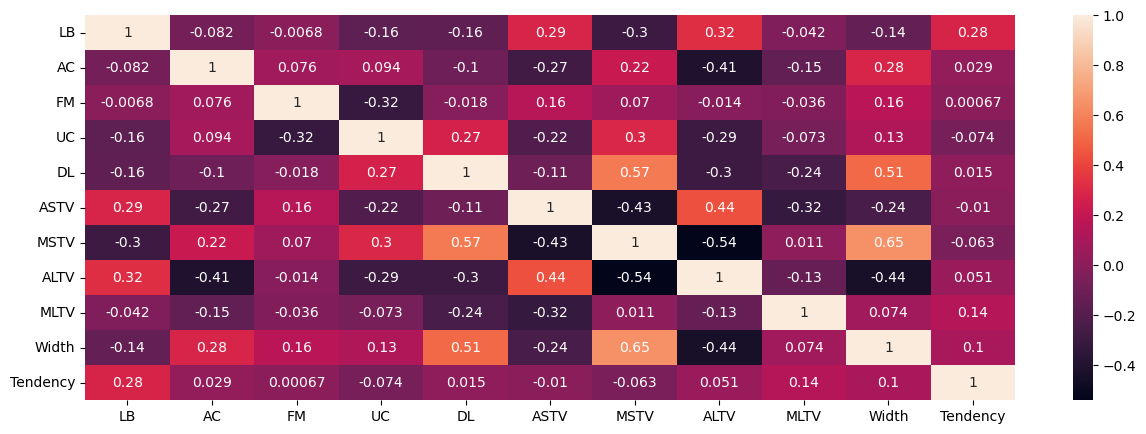

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(cd.corr(),annot=True)

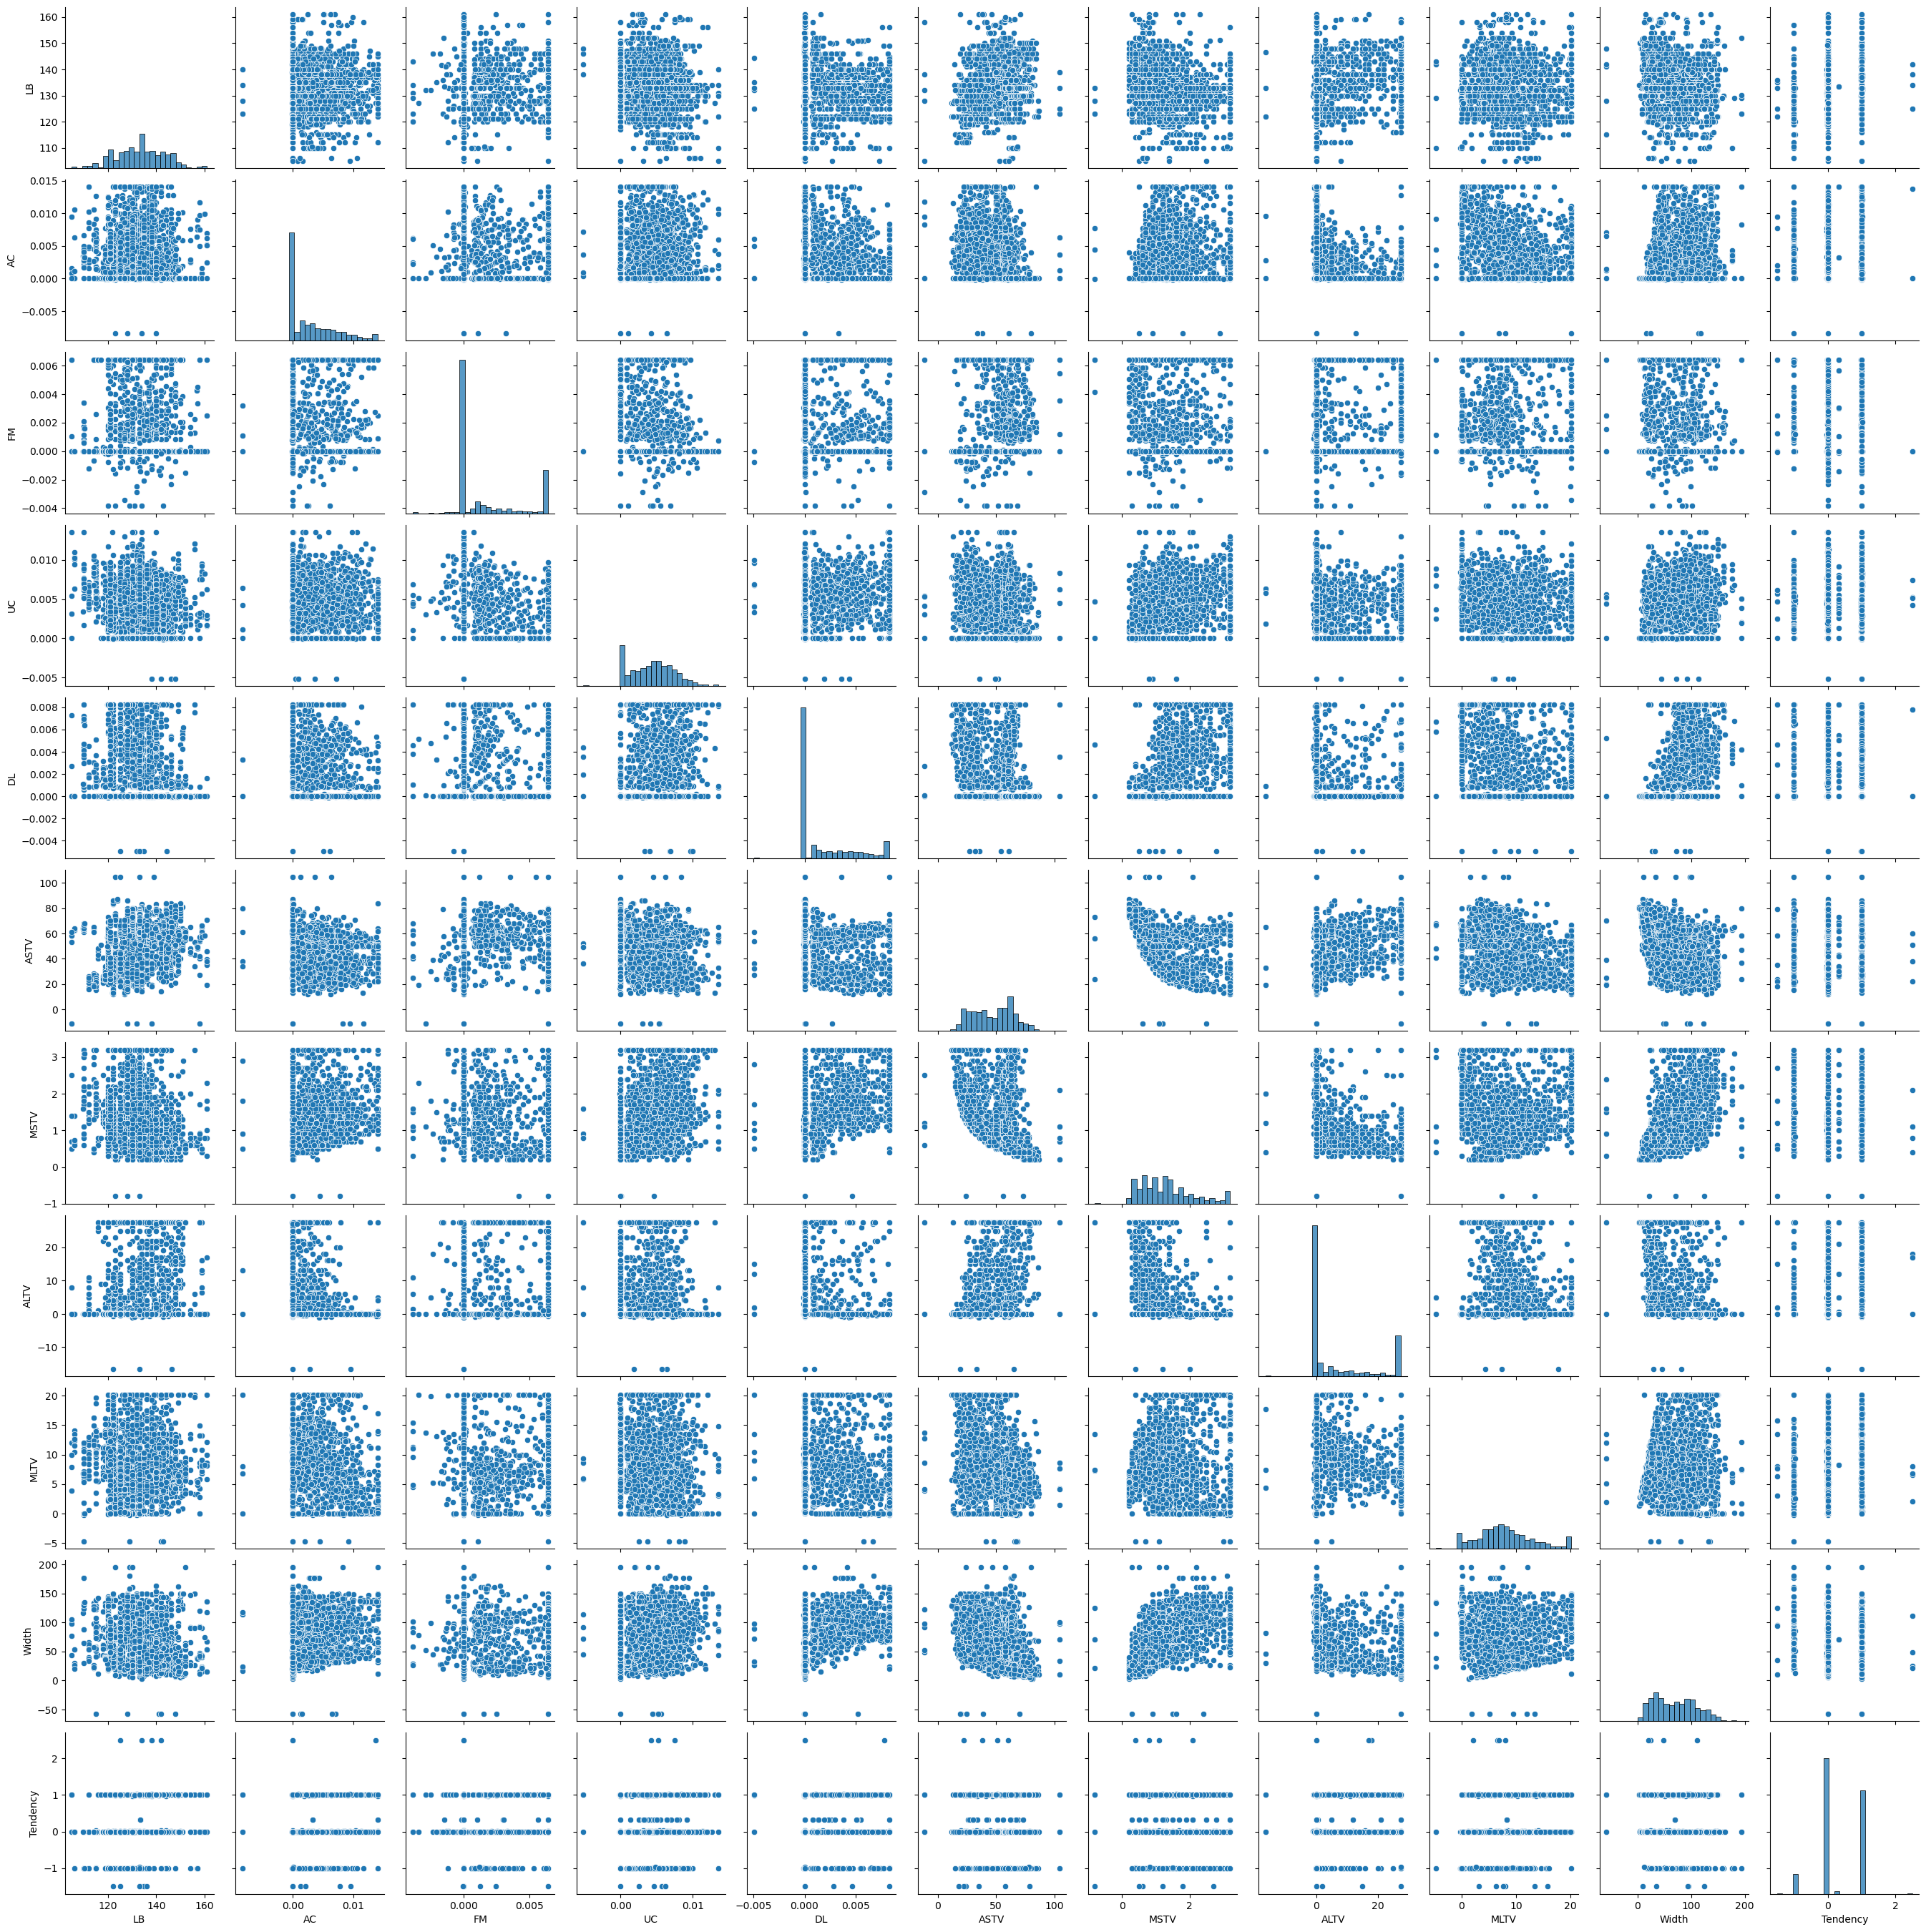

In [24]:
# pairplot

sns.pairplot(cd)

## Pattern recognition and insights

In [25]:
correlation_matrix = cd.corr()
print(correlation_matrix)

                LB        AC        FM        UC        DL      ASTV  \
LB        1.000000 -0.081669 -0.006815 -0.163308 -0.156278  0.285463   
AC       -0.081669  1.000000  0.076091  0.093575 -0.102934 -0.273178   
FM       -0.006815  0.076091  1.000000 -0.318156 -0.018024  0.155798   
UC       -0.163308  0.093575 -0.318156  1.000000  0.268151 -0.217484   
DL       -0.156278 -0.102934 -0.018024  0.268151  1.000000 -0.112289   
ASTV      0.285463 -0.273178  0.155798 -0.217484 -0.112289  1.000000   
MSTV     -0.295017  0.217933  0.070412  0.298462  0.566625 -0.433731   
ALTV      0.322748 -0.409829 -0.013820 -0.294226 -0.296383  0.438800   
MLTV     -0.042275 -0.152032 -0.036313 -0.072964 -0.242173 -0.323958   
Width    -0.140008  0.283771  0.164247  0.131110  0.514348 -0.242124   
Tendency  0.281361  0.029333  0.000673 -0.074266  0.014583 -0.010278   

              MSTV      ALTV      MLTV     Width  Tendency  
LB       -0.295017  0.322748 -0.042275 -0.140008  0.281361  
AC        0.2

## Conclusion

1. *Correlations*: Strong relationships (e.g., ads & sales) suggest that one affects the other.  
   - *Impact*: Focus on key drivers (e.g., increase ad spend to boost sales).  
   - *Next Step*: Test relationships with regression models.

2. *Trends Over Time*: Patterns (e.g., seasonal sales) help predict future behavior.  
   - *Impact*: Plan ahead for peak periods (e.g., stock up for holidays).  
   - *Next Step*: Use forecasting to predict future trends.

3. *Outliers*: Unusual data points can reveal mistakes or opportunities (e.g., a big sales spike).  
   - *Impact*: Fix errors, or capitalize on unique events.  
   - *Next Step*: Investigate causes and replicate if beneficial.

4. *Important Predictors*: Some factors (e.g., customer satisfaction) impact outcomes more than others.  
   - *Impact*: Prioritize improvements on key factors.  
   - *Next Step*: Use regression to measure impact.

5. *Segmenting Data*: Breaking data into groups (e.g., age, region) shows different behaviors.  
   - *Impact*: Tailor strategies to specific groups (e.g., promotions for younger customers).  
   - *Next Step*: Segment and target specific groups.

6. *Redundant Variables*: Similar variables (e.g., TV and online ads) may overlap.  
   - *Impact*: Simplify models by removing duplicates.  
   - *Next Step*: Identify and remove redundant features.